In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,7)

In [3]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
list(df.columns)

['area_type',
 'availability',
 'location',
 'size',
 'society',
 'total_sqft',
 'bath',
 'balcony',
 'price']

In [6]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
f = df.drop(['area_type','society','balcony','availability'],axis='columns')

In [8]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
df = df.dropna()
df.isnull().sum() # check there is no null value present

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [11]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '4 BHK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '2 Bedroom',
       '6 BHK', '7 BHK', '6 Bedroom'], dtype=object)

In [12]:
#Creating a BHK column from size
extract_num = lambda x: int(x.split(' ')[0])
df['BHK'] = df['size'].apply(extract_num)

In [13]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00,4


In [14]:
df[df['BHK']>15]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK


In [58]:
# there was problem in 4684 if BHF is 43 and size is 43 quite different so we drop the column
df = df.drop(4684)

In [16]:
df['total_sqft'].unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

In [17]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

def convert_str_value_to_num(x):
  value = x.split('-')
  if len(value) == 2:return (float(value[0])+float(value[1]))/2
  try: 
    return float(x)
  except:
    return None   

In [18]:
df[~df['total_sqft'].apply(is_float)].head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800,2


In [19]:
df.total_sqft = df.total_sqft.apply(convert_str_value_to_num)
df = df[df.total_sqft.notnull()]
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4


In [59]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
df.head()

,area_type,availability,society,total_sqft,bath,balcony,price,BHK,1st Phase JP Nagar,5th Phase JP Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,price_per_sqft
0,Super built-up Area,Ready To Move,Prhtsok,2825.0,4.0,3.0,250.0,4,1,0,...,0,0,0,0,0,0,0,0,0,8849.557522
1,Super built-up Area,Ready To Move,Prhtsok,1875.0,3.0,1.0,167.0,3,1,0,...,0,0,0,0,0,0,0,0,0,8906.666667
2,Super built-up Area,Ready To Move,NCaveun,1394.0,2.0,1.0,100.0,2,1,0,...,0,0,0,0,0,0,0,0,0,7173.601148
3,Super built-up Area,18-May,Inntsth,1077.0,2.0,2.0,93.0,2,1,0,...,0,0,0,0,0,0,0,0,0,8635.097493
4,Super built-up Area,18-May,Inntsth,1590.0,3.0,3.0,131.0,3,1,0,...,0,0,0,0,0,0,0,0,0,8238.993711


In [21]:
df['price_per_sqft'].describe()


count      7481.000000
mean       5992.058235
std        9160.840277
min         371.428571
25%        4279.131007
50%        5319.148936
75%        6696.629213
max      672727.272727
Name: price_per_sqft, dtype: float64

In [22]:
df.to_csv("BHP_cleaned.csv",index=False)

In [24]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi',
       'Lingadheeranahalli', 'Whitefield', '7th Phase JP Nagar',
       'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Ramakrishnappa Layout', 'Binny Pete',
       'Thanisandra', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kanakpura Road', 'Kundalahalli', 'Sarjapur  Road',
       'Ganga Nagar', 'Doddathoguru', 'Adarsh Nagar', 'Bhoganhalli',
       'Lakshminarayana Pura', 'Begur Road', 'Varthur', 'Gunjur',
       'Hegde Nagar', 'Haralur Road', 'Hennur Road', 'Cholanayakanahalli',
       'Kodanda Reddy Layout', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Kengeri', 'Yeshwanthpur', 'Chandapura',
       'Kothanur', 'Green View Layout', 'Shantiniketan Layout',
       'Rajaji Nagar', 'Devanahalli', 'Byatarayanapura', 'Akshaya Nagar',
       'LB Shastri Nagar', 'Hormavu', 'Peenya', 'Kudlu Gate',
       '8th Phase JP Nagar', 'Chandra Layout', 'Anandapura',
      

In [25]:
location_stats_less_10 = df_location_stat[df_location_stat<=10]
location_stats_less_10

Arekere                   10
Jalahalli East            10
Amruthahalli              10
Banashankari Stage III    10
Rayasandra                10
                          ..
1 Giri Nagar               1
Chikkabidarakallu          1
Mailasandra                1
Kattigenahalli             1
Abshot Layout              1
Name: location, Length: 482, dtype: int64

In [27]:
df[df.total_sqft/df.BHK<300].head()
df = df[~(df.total_sqft/df.BHK<300)]

In [28]:
df.price_per_sqft.describe()

count     7439.000000
mean      5851.020195
std       2705.465697
min        371.428571
25%       4283.397683
50%       5319.284802
75%       6693.881632
max      76530.612245
Name: price_per_sqft, dtype: float64

In [29]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [30]:
df = remove_pps_outliers(df)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Ready To Move,1st Phase JP Nagar,4 BHK,Prhtsok,2825.0,4.0,3.0,250.0,4,8849.557522
1,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,Prhtsok,1875.0,3.0,1.0,167.0,3,8906.666667
2,Super built-up Area,Ready To Move,1st Phase JP Nagar,2 BHK,NCaveun,1394.0,2.0,1.0,100.0,2,7173.601148
3,Super built-up Area,18-May,1st Phase JP Nagar,2 BHK,Inntsth,1077.0,2.0,2.0,93.0,2,8635.097493
4,Super built-up Area,18-May,1st Phase JP Nagar,3 BHK,Inntsth,1590.0,3.0,3.0,131.0,3,8238.993711


In [31]:
def plot_rates_for_BHK(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    bhk4 = df[(df.location==location) & (df.BHK==4)]
    plt.scatter(bhk2.total_sqft,bhk2.price , color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price , marker='+', color='green',label='3 BHK', s=50)
    plt.scatter(bhk4.total_sqft,bhk4.price , color='red' , marker='x',label='4 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

In [32]:
list(df.location.unique())

['1st Phase JP Nagar',
 '5th Phase JP Nagar',
 '7th Phase JP Nagar',
 '8th Phase JP Nagar',
 '9th Phase JP Nagar',
 'AECS Layout',
 'Abbigere',
 'Akshaya Nagar',
 'Ambalipura',
 'Ambedkar Nagar',
 'Anandapura',
 'Ardendale',
 'Attibele',
 'BTM 2nd Stage',
 'Badavala Nagar',
 'Balagere',
 'Banashankari',
 'Bannerghatta Road',
 'Battarahalli',
 'Begur',
 'Begur Road',
 'Bellandur',
 'Bharathi Nagar',
 'Bhoganhalli',
 'Billekahalli',
 'Binny Pete',
 'Bisuvanahalli',
 'Bommanahalli',
 'Bommasandra',
 'Bommenahalli',
 'Brookefield',
 'Budigere',
 'CV Raman Nagar',
 'Chandapura',
 'Channasandra',
 'Chikka Tirupathi',
 'Choodasandra',
 'Dasanapura',
 'Dasarahalli',
 'Devanahalli',
 'Dodda Nekkundi',
 'Doddathoguru',
 'Domlur',
 'EPIP Zone',
 'Electronic City',
 'Electronic City Phase II',
 'Electronics City Phase 1',
 'Frazer Town',
 'Gollarapalya Hosahalli',
 'Gottigere',
 'Green Glen Layout',
 'Gubbalala',
 'Gunjur',
 'HSR Layout',
 'Haralur Road',
 'Harlur',
 'Hebbal',
 'Hebbal Kempapura',

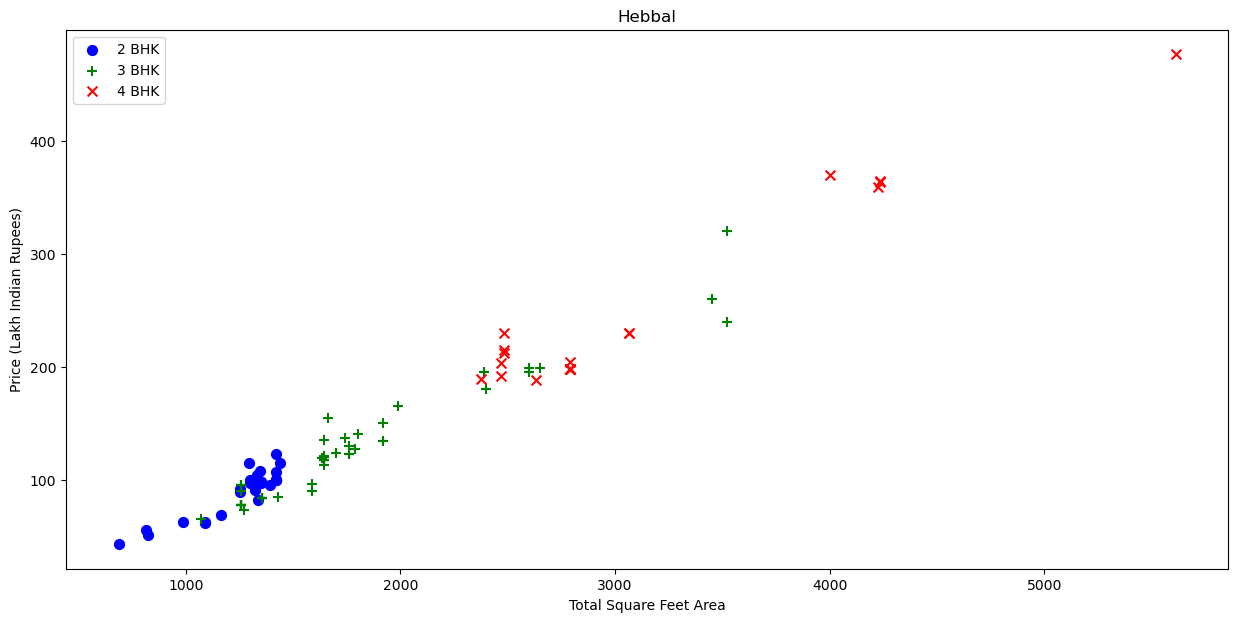

In [33]:
plot_rates_for_BHK(df,"Hebbal")

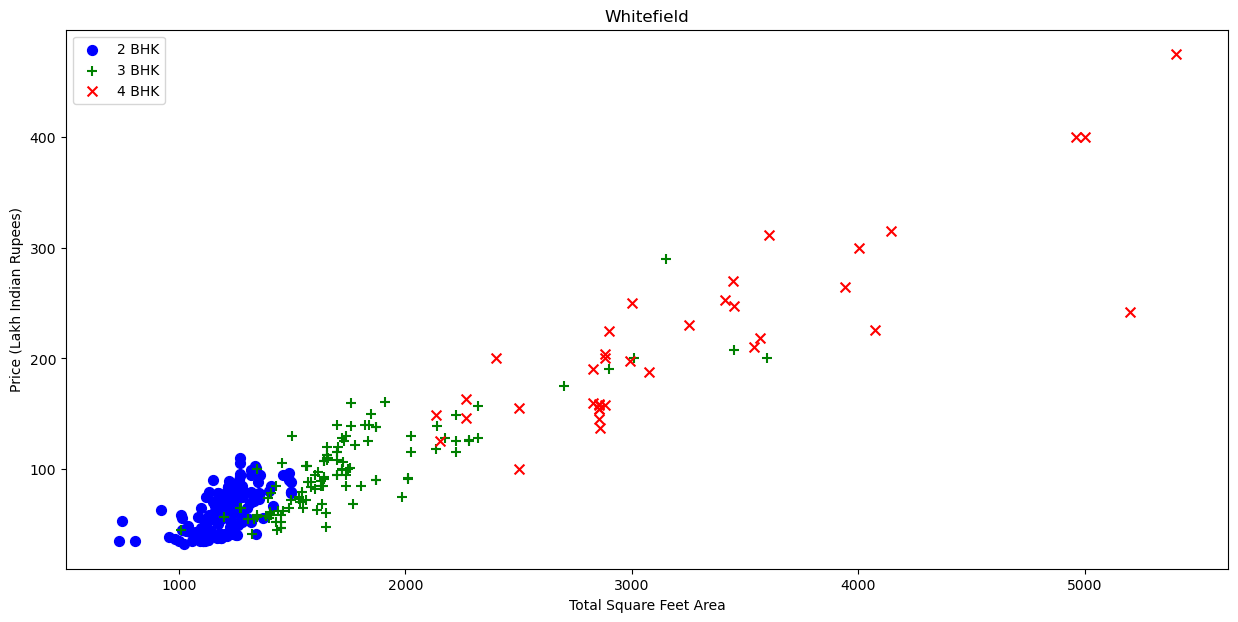

In [34]:
plot_rates_for_BHK(df,"Whitefield")

In [35]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

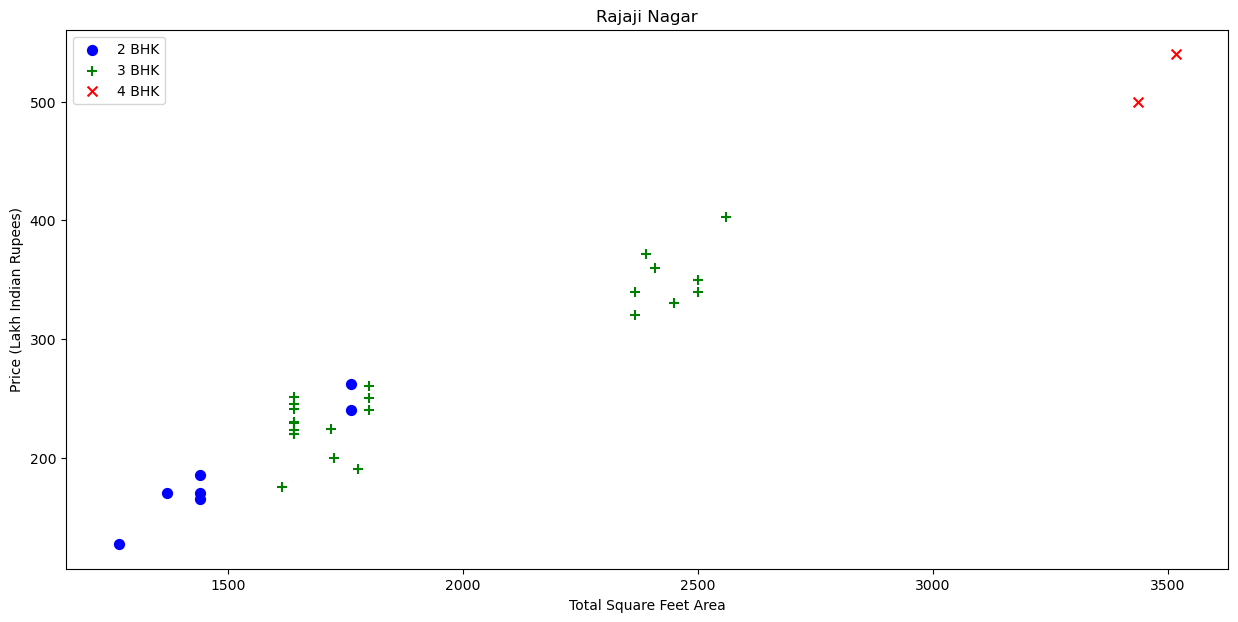

In [36]:
f = remove_bhk_outliers(df)
plot_rates_for_BHK(df,"Rajaji Nagar")

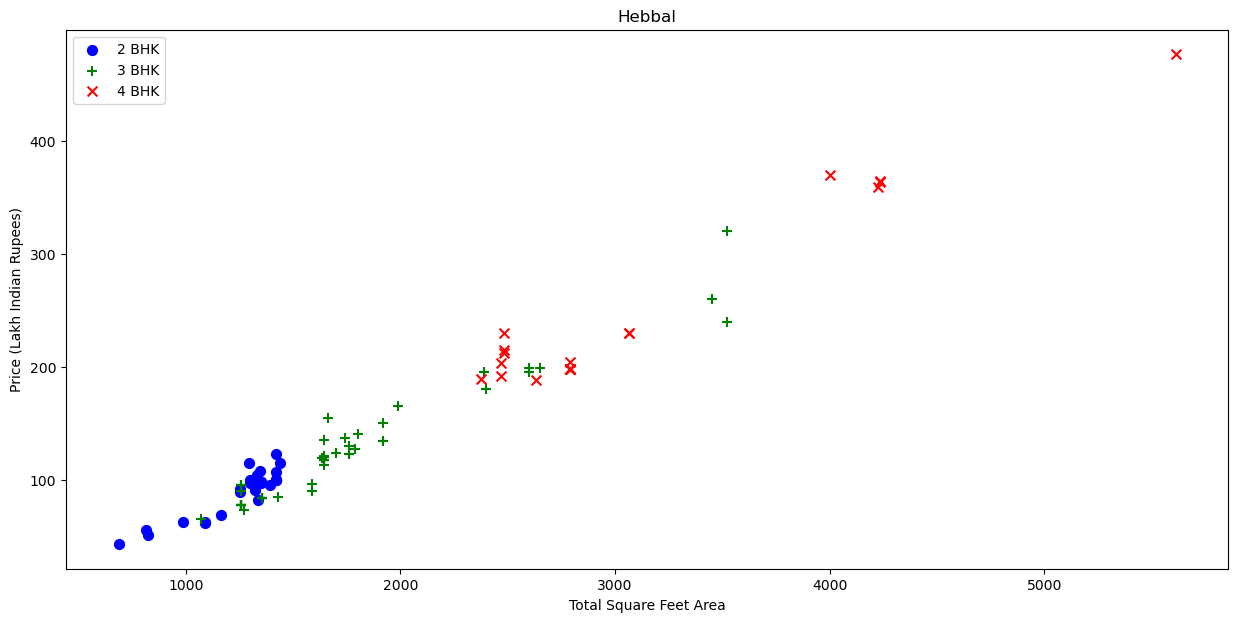

In [37]:
plot_rates_for_BHK(df,"Hebbal")

Text(0, 0.5, 'Count')

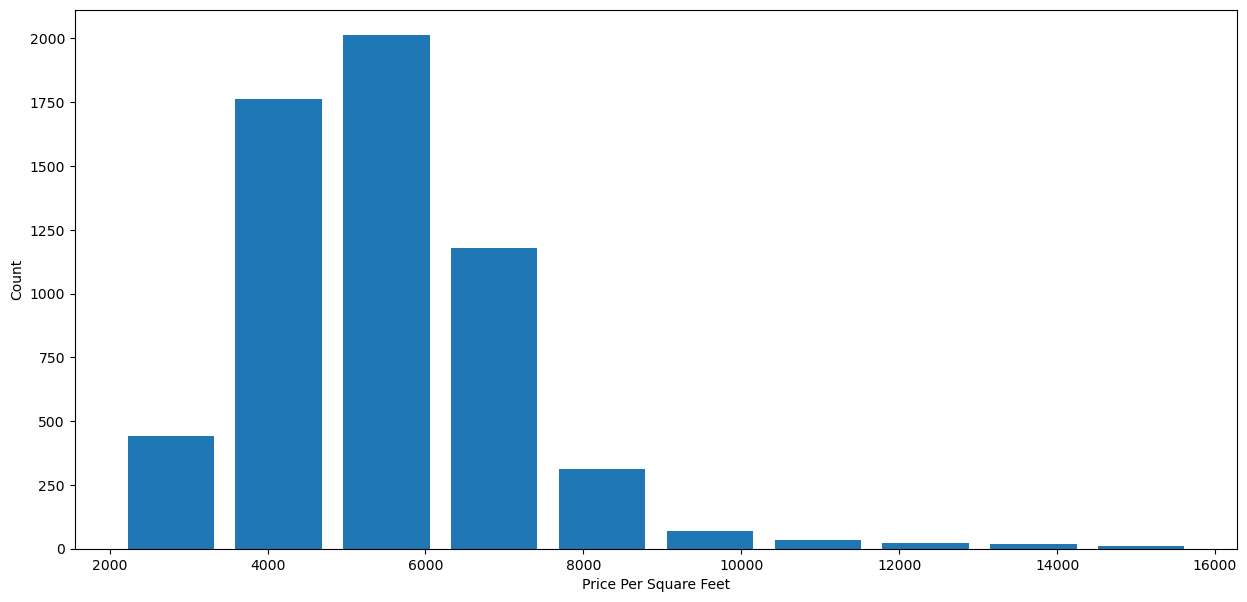

In [38]:
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [39]:
df = df[df.bath<df.BHK+2]
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Ready To Move,1st Phase JP Nagar,4 BHK,Prhtsok,2825.0,4.0,3.0,250.0,4,8849.557522
1,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,Prhtsok,1875.0,3.0,1.0,167.0,3,8906.666667
2,Super built-up Area,Ready To Move,1st Phase JP Nagar,2 BHK,NCaveun,1394.0,2.0,1.0,100.0,2,7173.601148
3,Super built-up Area,18-May,1st Phase JP Nagar,2 BHK,Inntsth,1077.0,2.0,2.0,93.0,2,8635.097493
4,Super built-up Area,18-May,1st Phase JP Nagar,3 BHK,Inntsth,1590.0,3.0,3.0,131.0,3,8238.993711


In [40]:
dummies = pd.get_dummies(df.location)
dummies.head(5)

,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Super built-up Area,Ready To Move,1st Phase JP Nagar,4 BHK,Prhtsok,2825.0,4.0,3.0,250.0,4,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,Prhtsok,1875.0,3.0,1.0,167.0,3,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,1st Phase JP Nagar,2 BHK,NCaveun,1394.0,2.0,1.0,100.0,2,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,18-May,1st Phase JP Nagar,2 BHK,Inntsth,1077.0,2.0,2.0,93.0,2,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,18-May,1st Phase JP Nagar,3 BHK,Inntsth,1590.0,3.0,3.0,131.0,3,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df = df.drop(['location','size','price_per_sqft'],axis='columns')
df.head(5)

,area_type,availability,society,total_sqft,bath,balcony,price,BHK,1st Phase JP Nagar,5th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Super built-up Area,Ready To Move,Prhtsok,2825.0,4.0,3.0,250.0,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,Ready To Move,Prhtsok,1875.0,3.0,1.0,167.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,NCaveun,1394.0,2.0,1.0,100.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,18-May,Inntsth,1077.0,2.0,2.0,93.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,18-May,Inntsth,1590.0,3.0,3.0,131.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df.price

0       250.00
1       167.00
2       100.00
3        93.00
4       131.00
         ...  
5857     49.50
5858     65.00
5859    110.00
5860     63.93
5861     80.00
Name: price, Length: 5808, dtype: float64

In [44]:
f.to_csv("ModeifiedCleanedData.csv",index=False)
feature = df.drop(['price'],axis='columns')
label =  df.price

In [45]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(feature , label , test_size = 0.2 , random_state = 10)

In [48]:
from sklearn.linear_model import LinearRegression

In [71]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(feature.columns==location)[0][0]
    x = np.zeros(len(feature.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [69]:
import pickle
with open('model.pickle','wb') as f:
    pickle.dump(model,f)

In [75]:
import json
columns = {
    'data_columns' : [col.lower() for col in feature.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))